<a href="https://colab.research.google.com/github/dina-masry/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
- Author: Dina-masry

##Project Overview

##Load and Inspect Data

In [29]:
import pandas as pd
fname = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

In [31]:
df.shape

(8523, 12)

 - There are 8523 rows and 12 columns

In [32]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


 - All data types are as they should be

In [33]:
# duplicated rows
df.duplicated().sum()

np.int64(0)

 - There are no duplicated rows

In [34]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [35]:
df.isna().sum()/len(df)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


 - There are 1463 missing values in Item_Weight column (17.16%)
 - There are 2410 missing values in Outlet_Size (28.276%)

### Handle missing values in Item_Weight column

In [36]:
df['Item_Weight'].value_counts().sort_values(ascending=False)

,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.800,2
6.520,1
9.420,1


-Strategy 1 : fill missing values with the most frequent value. \
-Strategy 2: fill missing values with the mean , if there are not outliers\
-Strategy 3: fill missing values with the median , if there are outliers\
-Strategy 4: fill missing values with unexpected values like 0 or -1

<Axes: xlabel='Item_Weight'>

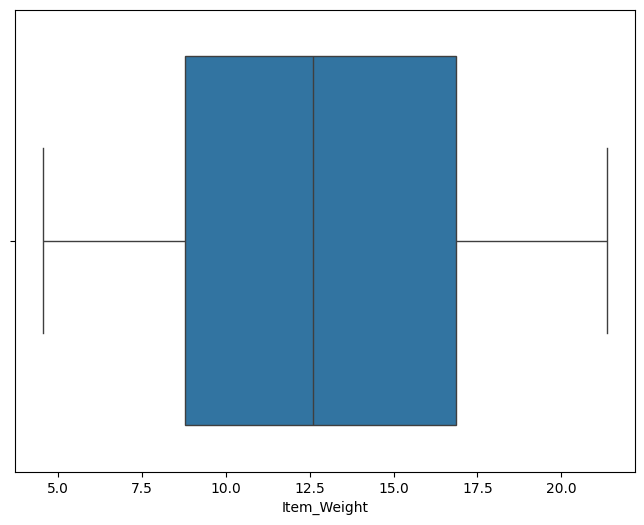

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Item_Weight'])

 - It is noticed from boxPlot that there is not any outlier , so we can handle missing values with  the mean

In [38]:
df['Item_Weight'].mean()

np.float64(12.857645184135976)

In [39]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [40]:
df['Item_Weight'].isna().sum()

np.int64(0)

In [41]:
df['Item_Weight'].mean() # note that mean did not affect , it is still the same

np.float64(12.857645184135976)

### Handle missing values in Outlet_Size

In [42]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


- We have two options to handle missing values in Outlet_Size column:\
Strategy 1 : fill missing values with the mode (Medium) \
Strategy 2 : fill missing values with 'Unknown' or 'missing'

- I will choose strategy 2

In [43]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('missing')

In [44]:
df['Outlet_Size'].isna().sum()

np.int64(0)

In [45]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
missing,2410
Small,2388
High,932


In [46]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


### Checking consistency

In [50]:
pd.set_option('display.max_rows', None)
df.head()
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
  print(df[col].value_counts())
  print('---------------------------')


Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
FDW26     9
NCQ06     9
DRN47     9
FDV38     9
FDX20     9
DRE49     9
NCI54     9
FDU12     9
FDG09     9
FDP25     9
FDF52     9
FDO19     9
FDF56     9
FDV60     9
NCF42     9
NCJ30     9
FDX04     9
FDQ40     9
FDW49     9
FDD38     9
NCB18     9
NCL31     9
DRA59     8
FDR52     8
FDC14     8
FDF04     8
FDA15     8
FDO10     8
FDA13     8
FDF22     8
FDT49     8
FDN56     8
FDW24     8
FDV26     8
NCO54     8
DRK35     8
FDA44     8
FDA50     8
FDR48     8
FDR43     8
FDE11     8
FDQ39     8
FDT40     8
NCI29     8
FDJ58     8
FDD29     8
DRF03     8
FDT55     8
FDR59     8
NCQ43     8
FDX58     8
FDX50     8
NCB31     8
FDS52     8
FDO32     8
FDY47     8
DRF23     8
FDD05     8
FDH10     8
FDW48     8
FDS55     8
FDZ33     8
FDB17     8
FDT24     8
NCM07     8
DRP35     8
NCK53     8
DRI03     8
FDL34     8
DRF01     8
FDH27     8
FDR04     8
FDS33     8
FDY49     8
FDV09     8
FDU23     8
FDU13     8


- There inconsistency in Item_Fat_Content as \
low Fat = low fat = LF \
Regular = reg

In [52]:
#Handle consistency in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts() # show that it becomes consistent

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


### Obtain summary statistics (min ,max , mean ) for numerical columns

In [53]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

##Feature Inspection